In [1]:
import squigglepy as sq
import numpy as np

from datetime import datetime
from pprint import pprint

from libs import run_model, calculate_doubling_time, plot_exponential_growth, analyze_agi_arrival
from params import start_task_length, agi_task_length, doubling_time, acceleration, shift


O3_LAUNCH_DATE = datetime(2025, 4, 16)
CLAUDE_3P7_LAUNCH_DATE = datetime(2025, 2, 24)

print('Loaded libraries')

## START task length (displayed in sec) ##
{1: 1.0,
 5: 1.0,
 10: 1.0,
 20: 1.0,
 30: 1.41,
 40: 2.97,
 50: 5.85,
 60: 11.5,
 70: 23.36,
 80: 52.71,
 90: 165.47,
 95: 432.96,
 99: 2433.01}



## AGI task length (displayed in hrs) ##
{1: 40,
 5: 50,
 10: 80,
 20: 140,
 30: 208,
 40: 292,
 50: 400,
 60: 547,
 70: 767,
 80: 1140,
 90: 2006,
 95: 3166,
 99: 7279}



## DOUBLING TIME (displayed in days) ##
{1: 94,
 5: 118,
 10: 118,
 20: 118,
 30: 135,
 40: 160,
 50: 186,
 60: 212,
 70: 212,
 80: 212,
 90: 221,
 95: 252,
 99: 315}



## ACCELERATION
{1: 0.903,
 5: 0.978,
 10: 1.0,
 20: 1.0,
 30: 1.0,
 40: 1.0,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 1.0,
 90: 1.001,
 95: 1.022,
 99: 1.099}



## SHIFT (displayed in days) ##
{1: 0,
 5: 30,
 10: 57,
 20: 89,
 30: 111,
 40: 131,
 50: 150,
 60: 168,
 70: 188,
 80: 211,
 90: 243,
 95: 270,
 99: 318}
Loaded libraries


In [2]:
def adapted_metr_model():
    start_task_length_ = start_task_length * (2 ** (shift / doubling_time))
    days = calculate_doubling_time(start_task_length_, agi_task_length, doubling_time, acceleration)
    measurement_error_variance = sq.invlognorm(0.8, 1.5) # Add measurement error on tasks: SD fit to trend variance from Figure 12
    return days * measurement_error_variance

samples = run_model(adapted_metr_model, index_date=O3_LAUNCH_DATE, cores=4)

Generating samples with 4 cores...


100%|███████████████████████████████████████████████████████████████████████████| 100000/100000 [00:28<00:00, 3511.78it/s]


Shuffling data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1710.04it/s]


...Collected!
{1: 1035,
 5: 1452,
 10: 1709,
 20: 2093,
 30: 2408,
 40: 2724,
 50: 3058,
 60: 3420,
 70: 3844,
 80: 4328,
 90: 5053,
 95: 5688,
 99: 7174}

-

{1: '2028 Feb 16',
 5: '2029 Apr 08',
 10: '2029 Dec 21',
 20: '2031 Jan 09',
 30: '2031 Nov 19',
 40: '2032 Oct 01',
 50: '2033 Aug 31',
 60: '2034 Aug 28',
 70: '2035 Oct 25',
 80: '2037 Feb 21',
 90: '2039 Feb 15',
 95: '2040 Nov 12',
 99: '2044 Dec 06'}


In [3]:
analyze_agi_arrival(samples)

## DISTRIBUTION OF AGI ARRIVAL DATE ##
1%: 2027.8
2%: 2028.3
3%: 2028.6
4%: 2028.8
5%: 2029.0
10%: 2029.7
15%: 2030.2
20%: 2030.7
25%: 2031.2
35%: 2032.0
50%: 2033.4
60%: 2034.4
75%: 2036.2
80%: 2036.9
90%: 2038.8
95%: 2040.6


## DISTRIBUTION OF RELATIVE AGI ARRIVAL DATE ##
1%: 2.8 years from now
2%: 3.3 years from now
3%: 3.6 years from now
4%: 3.8 years from now
5%: 4.0 years from now
10%: 4.7 years from now
15%: 5.2 years from now
20%: 5.7 years from now
25%: 6.2 years from now
35%: 7.0 years from now
50%: 8.4 years from now
60%: 9.4 years from now
75%: 11.2 years from now
80%: 11.9 years from now
90%: 13.8 years from now
95%: 15.6 years from now
(Mean: 9 years from now)


## AGI ARRIVAL DATE BY BIN ##
2025: 0.0%
2026: 0.2%
2027: 1.1%
2028: 3.8%
2029: 7.6%
2030-2031: 21.9%
2032-2034: 30.8%
2035-2039: 28.3%
2040-2049: 6.0%
2050-2059: 0.1%
2060-2069: 0.0%
2070-2079: 0.0%
2080-2089: 0.0%
2090-2099: 0.0%
>2100: 0.0%


## AGI ARRIVAL DATE BY YEAR ##
By EOY 2025: 0.0%
By EOY 2026: 0.2%
B

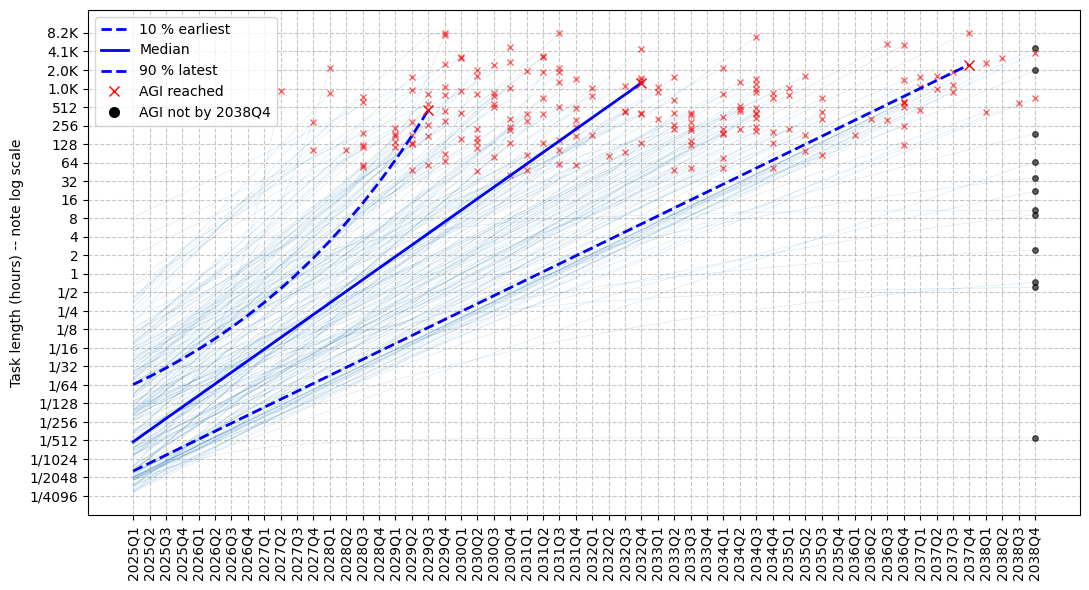

In [4]:
plot_exponential_growth(
    doubling_time_days=doubling_time,
    starting_hours=start_task_length,
    agi_task_length=agi_task_length,
    shift=shift,
    acceleration=acceleration,
    n_quarters=55,
    n_samples=100_000,
    n_traces=200,
    max_task_power=13,
    min_y_power=-15,
)